# Case Based 2 Machine Learning
Muhammad Rieza Fachrezi

1301204335

IF-44-11

## Import & Load Dataset

In [ ]:
# Import semua library yang dibutuhkan
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 50)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [ ]:
# Download Dataset dari Github
df = pd.read_csv("https://raw.githubusercontent.com/riezaf51/data-water/main/water-treatment.data", header=None)

In [ ]:
# Penamaan Kolom pada Dataset
df.columns = ["DATE","Q-E", "ZN-E", "PH-E", "DBO-E", "DQO-E", "SS-E", "SSV-E", "SED-E", "COND-E", "PH-P", "DBO-P", "SS-P", "SSV-P", "SED-P", "COND-P", "PH-D", "DBO-D", "DQO-D", "SS-D",
  "SSV-D", "SED-D", "COND-D", "PH-S", "DBO-S", "DQO-S", "SS-S", "SSV-S", "SED-S", "COND-S", "RD-DBO-P", "RD-SS-P", "RD-SED-P", "RD-DBO-S", "RD-DQO-S", "RD-DBO-G", "RD-DQO-G",
  "RD-SS-G", "RD-SED-G"]

In [ ]:
# Menampilkan data dari df
df

,DATE,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,DBO-P,SS-P,SSV-P,SED-P,COND-P,PH-D,DBO-D,DQO-D,SS-D,SSV-D,SED-D,COND-D,PH-S,DBO-S,DQO-S,SS-S,SSV-S,SED-S,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101,1.50,7.80,?,407,166,66.3,4.5,2110,7.90,?,228,70.2,5.5,2120,7.90,?,280,94,72.3,0.3,2010,7.3,?,84,21,81.0,0.02,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.70,?,443,214,69.2,6.5,2660,7.70,?,244,75.4,7.7,2570,7.60,?,474,96,79.2,0.4,2700,7.5,?,91,17,94.1,0.00,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.60,?,528,186,69.9,3.4,1666,7.70,?,220,72.7,4.5,1594,7.70,?,272,92,78.3,0.2,1742,7.6,?,128,21,81,0.05,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.90,205,588,192,65.6,4.5,2430,7.80,236,268,73.1,8.5,2280,7.80,158,376,96,77.1,0.4,2060,7.6,20,104,20,96.7,0.00,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.00,242,496,176,64.8,4.0,2110,7.90,?,236,57.6,4.5,2020,7.80,?,372,88,68.2,0.2,2250,7.6,19,108,22,65.9,0.02,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,D-26/8/91,32723,0.16,7.70,93,252,176,56.8,2.3,894,7.70,108,146,65.8,3.0,873,7.70,63,224,55,78.2,0.2,915,7.9,19,54,6,100,0.01,942,?,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,D-27/8/91,33535,0.32,7.80,192,346,172,68.6,4.0,988,7.80,210,192,68.8,4.5,991,7.70,100,215,80,73.8,0.1,966,7.9,17,88,16,90.0,0.00,950,?,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100
524,D-28/8/91,32922,0.30,7.40,139,367,180,64.4,3.0,1060,7.50,163,200,63.0,3.5,1040,7.60,105,250,70,85.7,0.1,1152,7.7,25,84,20,84.0,0.02,1136,?,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99
525,D-29/8/91,32190,0.30,7.30,200,545,258,65.1,4.0,1260,7.40,191,226,67.3,3.5,1198,7.50,115,244,77,76.6,0.1,1351,7.7,21,71,27,71.1,0.01,1326,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


## Data Preprocessing

In [ ]:
# Cek jumlah nilai unik pada setiap kolom
print("Jumlah nilai unik")
for column in df.columns:
  print(f"{column} : {len(df[column].unique())}")
print("Jumlah row dataset:", len(df))

Jumlah nilai unik
DATE : 527
Q-E : 504
ZN-E : 173
PH-E : 16
DBO-E : 205
DQO-E : 289
SS-E : 142
SSV-E : 275
SED-E : 60
COND-E : 414
PH-P : 13
DBO-P : 226
SS-P : 154
SSV-P : 285
SED-P : 64
COND-P : 412
PH-D : 13
DBO-D : 149
DQO-D : 230
SS-D : 75
SSV-D : 243
SED-D : 23
COND-D : 410
PH-S : 16
DBO-S : 44
DQO-S : 137
SS-S : 58
SSV-S : 194
SED-S : 18
COND-S : 413
RD-DBO-P : 315
RD-SS-P : 308
RD-SED-P : 144
RD-DBO-S : 185
RD-DQO-S : 265
RD-DBO-G : 156
RD-DQO-G : 231
RD-SS-G : 183
RD-SED-G : 43
Jumlah row dataset: 527


Kolom DATE memiliki nilai unik sebanyak 527 yang sama dengan jumlah row, yaitu 527. Kolom DATE juga merupakan atribut identifier sehingga bisa kita drop.

In [ ]:
# Drop kolom ID
df = df.drop('DATE', axis=1)

Akan dilakukan pengecekan nilai null pada dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q-E       527 non-null    object 
 1   ZN-E      527 non-null    object 
 2   PH-E      527 non-null    float64
 3   DBO-E     527 non-null    object 
 4   DQO-E     527 non-null    object 
 5   SS-E      527 non-null    object 
 6   SSV-E     527 non-null    object 
 7   SED-E     527 non-null    object 
 8   COND-E    527 non-null    int64  
 9   PH-P      527 non-null    float64
 10  DBO-P     527 non-null    object 
 11  SS-P      527 non-null    int64  
 12  SSV-P     527 non-null    object 
 13  SED-P     527 non-null    object 
 14  COND-P    527 non-null    int64  
 15  PH-D      527 non-null    float64
 16  DBO-D     527 non-null    object 
 17  DQO-D     527 non-null    object 
 18  SS-D      527 non-null    object 
 19  SSV-D     527 non-null    object 
 20  SED-D     527 non-null    object

Apabila dilihat dari info(), dataset tidak memiliki nilai null. Akan tetapi jika kita lihat datasetnya secara langsung, terdapat nilai "?" pada dataset.

In [ ]:
# Mencari jumlah data yang memiliki nilai ? pada setiap kolom
(df=='?').sum()

Q-E         18
ZN-E         3
PH-E         0
DBO-E       23
DQO-E        6
SS-E         1
SSV-E       11
SED-E       25
COND-E       0
PH-P         0
DBO-P       40
SS-P         0
SSV-P       11
SED-P       24
COND-P       0
PH-D         0
DBO-D       28
DQO-D        9
SS-D         2
SSV-D       13
SED-D       25
COND-D       0
PH-S         1
DBO-S       23
DQO-S       18
SS-S         5
SSV-S       17
SED-S       28
COND-S       1
RD-DBO-P    62
RD-SS-P      4
RD-SED-P    27
RD-DBO-S    40
RD-DQO-S    26
RD-DBO-G    36
RD-DQO-G    25
RD-SS-G      8
RD-SED-G    31
dtype: int64

In [ ]:
print("Jumlah baris beratribut ?:",len(df[df.eq("?").any(1)]))

Jumlah baris beratribut ?: 147


Terdapat 147 baris data yang memiliki atribut bernilai ?. Karena nilai dari missing data ini tidak diketahui, maka akan kita drop semua 147 baris tersebut.

In [ ]:
# Drop semua baris yang memiliki atribut bernilai ?
df = df[~df.isin(['?']).any(1)]
print("Jumlah baris setelah dilakukan drop:",len(df))

Jumlah baris setelah dilakukan drop: 380


In [ ]:
# Konversi semua kolom ke dalam nilai float
df = df.astype(float)

Akan dihapus data duplikat dari dataset jika ada

In [ ]:
print("Jumlah baris sebelum penghapusan data duplikat:",len(df))
df = df.drop_duplicates(keep = 'first')
print("Jumlah baris setelah penghapusan data duplikat:",len(df))

Jumlah baris sebelum penghapusan data duplikat: 380
Jumlah baris setelah penghapusan data duplikat: 380


Akan ditampilkan correlation heatmap untuk melihat korelasi antar atribut.

<ipython-input-1089-7c67a55f496e>:4: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



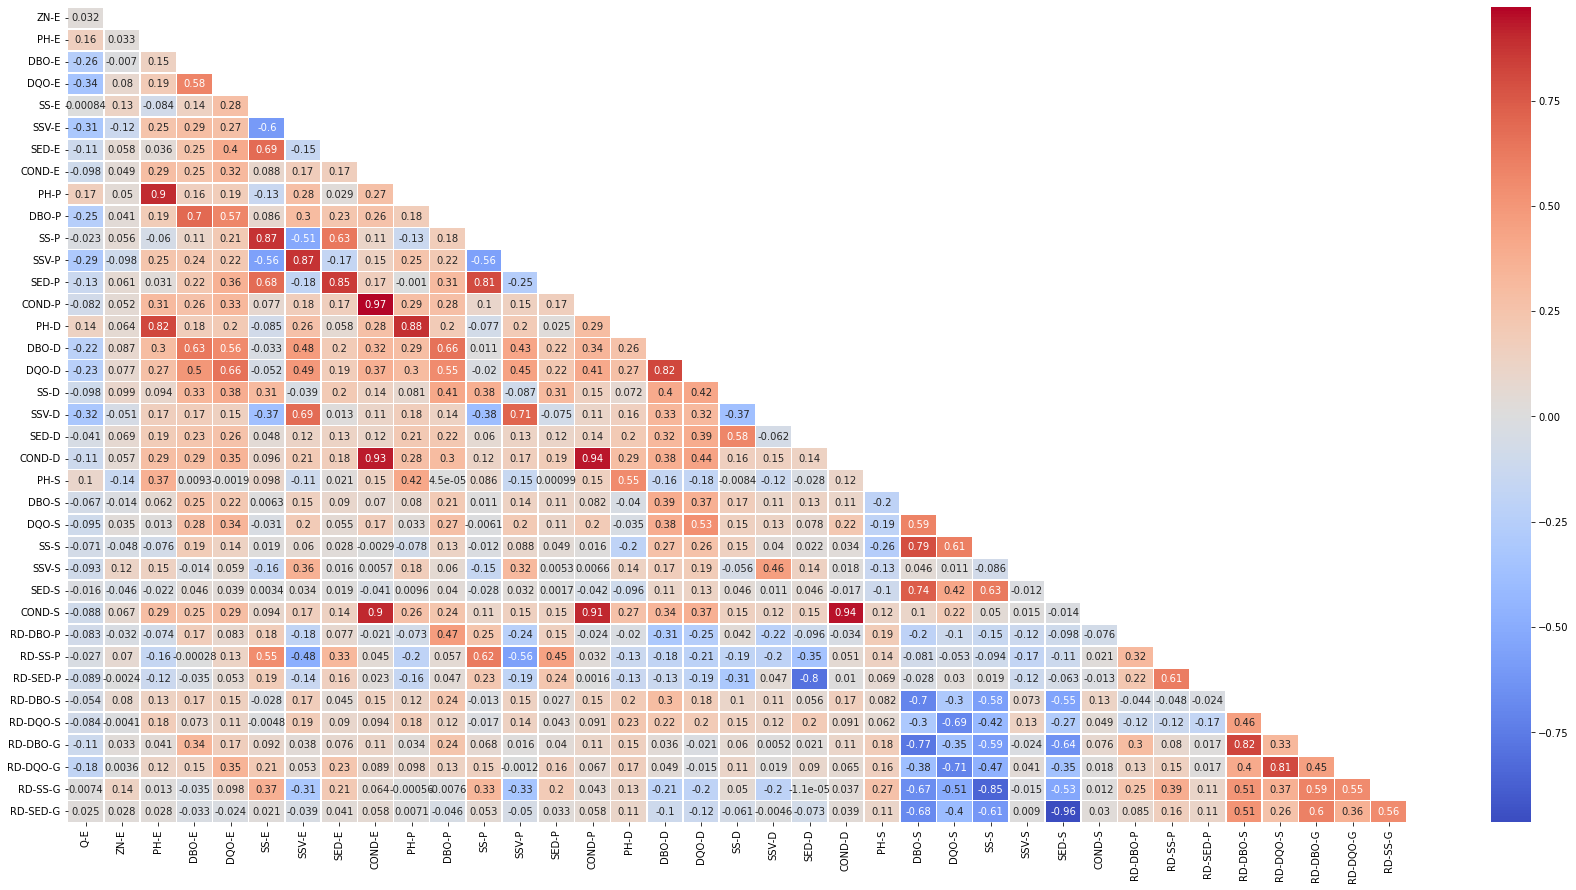

In [ ]:
#Membuat correlation matrix
fig, ax = plt.subplots(figsize=(30,15))
corr = df.corr()
mask = np.tril(np.ones_like(corr, dtype = np.bool), k=-1)
sns.heatmap(corr.where(mask).iloc[1:,:-1], annot=True, cmap = 'coolwarm', ax=ax, linewidths=.5)

Terdapat kolom ZN-E yang berarti input zinc ke pabrik pembersihan air. ZN-E tidak berkorelasi dengan atribut lainnya dan juga tidak diukur kembali pada setiap tahap pembersihan air, sehingga kita drop kolom ZN-E.

In [ ]:
df = df.drop('ZN-E', axis = 1)

Semua kolom COND mulai dari input sampai output memiliki korelasi sangat tinggi yaitu > 0,9. Ini menandakan atribut COND tidak berubah secara signifikan dari proses awal sampai akhir, maka kita drop semua kolom COND.

In [ ]:
df = df.drop(['COND-E', 'COND-P', 'COND-D', 'COND-S'], axis = 1)

Semua kolom PH juga saling berkorelasi. Ini menandakan atribut PH tidak berubah secara signifikan dari proses awal sampai akhir, maka kita drop semua kolom PH.

In [ ]:
df = df.drop(['PH-E', 'PH-P', 'PH-D', 'PH-S'], axis = 1)

Dari sini, dapat kita akan menggabungkan beberapa atribut yang tersisa menjadi satu. Akan dikelompokkan atribut tersebut berdasarkan Input, Output, dan Performance.

In [ ]:
input_features = ["Q-E", "DBO-E", "DQO-E", "SS-E", "SSV-E", "SED-E", "DBO-P", "SS-P", "SSV-P", "SED-P", "DBO-D", "DQO-D",
                  "SS-D","SSV-D", "SED-D"]
output_features = ["DBO-S", "DQO-S", "SS-S", "SSV-S", "SED-S"]
performance_features = ["RD-DBO-P", "RD-SS-P", "RD-SED-P", "RD-DBO-S", "RD-DQO-S", "RD-DBO-G", "RD-DQO-G", "RD-SS-G", "RD-SED-G"]

df_reducted = df.copy()
df_reducted = df_reducted.iloc[:, 38:]
df_reducted['Input'] = 0
df_reducted['Output'] = 0
df_reducted['Performance'] = 0
for column in input_features:
  df_reducted['Input'] = df_reducted['Input'] + (df[column]/df[column].mean())
for column in output_features:
  df_reducted['Output'] = df_reducted['Output'] + (df[column]/df[column].mean())
for column in performance_features:
  df_reducted['Performance'] = df_reducted['Performance'] + (df[column]/df[column].mean())

Disini akan kita cek outlier dari data

AxesSubplot(0.125,0.125;0.775x0.755)


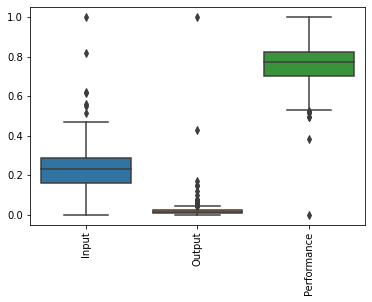

In [ ]:
df_boxplot = (df_reducted - df_reducted.min())/(df_reducted.max()-df_reducted.min()) #Normalisasi untuk visualisasi setiap kolom

#Membuat boxplot untuk visualisasi outlier
ax = sns.boxplot(data=df_boxplot)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
print(ax)

Terlihat bahwa atribut-atribut memiliki masalah outlier yang cukup signifikan. Maka dari itu akan kita hapus data yang termasuk outlier.

In [ ]:
q1 = df_reducted['Input'].quantile(0.25)
q3 = df_reducted['Input'].quantile(0.75)
iqr = q3 - q1

lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr

df_filtered = df_reducted[(df_reducted['Input'] < ub) & (df_reducted['Input'] > lb)]

q1 = df_reducted['Output'].quantile(0.25)
q3 = df_reducted['Output'].quantile(0.75)
iqr = q3 - q1

lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr

df_filtered = df_filtered[(df_filtered['Output'] < ub) & (df_filtered['Output'] > lb)]

q1 = df_reducted['Performance'].quantile(0.25)
q3 = df_reducted['Performance'].quantile(0.75)
iqr = q3 - q1

lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr

df_filtered = df_filtered[(df_filtered['Performance'] < ub) & (df_filtered['Performance'] > lb)]

AxesSubplot(0.125,0.125;0.775x0.755)


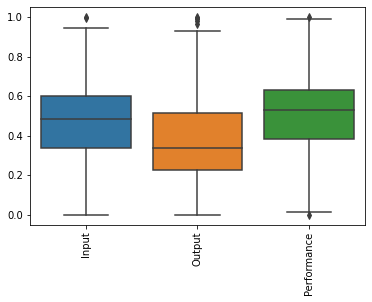

In [ ]:
df_boxplot = (df_filtered - df_filtered.min())/(df_filtered.max()-df_filtered.min()) #Normalisasi untuk visualisasi setiap kolom

#Membuat boxplot untuk visualisasi outlier
ax = sns.boxplot(data=df_boxplot)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
print(ax)

In [ ]:
print("Jumlah baris setelah penghapusan outlier:",len(df_filtered))

Jumlah baris setelah penghapusan outlier: 350


## Implementasi K-Means

In [ ]:
# Fungsi untuk membuat K centroid baru secara acak
def initialize_centroids(data, k):
  centroids = []
  for i in range(k):
    centroid = data.apply(lambda x:float(x.sample()))
    centroids.append(centroid)
  if k == 1:
    return pd.DataFrame(centroids)
  return pd.concat(centroids, axis = 1)

# Fungsi mencari cluster terdekat dari setiap data point
def get_labels(data, centroids):
  distances = centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis = 1))) # Jarak Euclidean
  return distances.idxmin(axis = 1)

# Mencari centroid baru berdasarkan cluster dari iterasi sebelumnya
def new_centroids(data, labels, k):
  return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

# Mencari SSE dari hasil clustering
def get_inertia(data, centroids):
  distances = centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis = 1)))
  return distances.min(axis = 1).sum()

## Model Training & Evaluation

Akan dilakukan normalisasi dari dataset yang sudah dilakukan reduksi dimensi.

In [ ]:
# Scaling Min-Max
X_train = df_filtered
X_train = (X_train - X_train.min())/ (X_train.max()-X_train.min())
X_train.describe()

,Input,Output,Performance
count,350.00,350.00,350.00
mean,0.48,0.38,0.51
std,0.19,0.21,0.19
min,0.00,0.00,0.00
25%,0.34,0.23,0.38
50%,0.48,0.34,0.53
75%,0.60,0.51,0.63
max,1.00,1.00,1.00


Disini kita akan mencari nilai K yang paling optimal menggunakan elbow method.

In [ ]:
KMAX = 10
MAX_ITERATION = 100
dbs = []
sse = {}
for k in range(1,KMAX):
  centroids = initialize_centroids(X_train, k)
  old_centroids = pd.DataFrame()
  iteration = 1

  while iteration < MAX_ITERATION and not centroids.equals(old_centroids):
    old_centroid = centroids
    labels = get_labels(X_train, centroids)
    centroids = new_centroids(X_train, labels, k)
    iteration += 1

  inertia = get_inertia(X_train,centroids)
  sse[k] = inertia
  if k != 1:
    dbs.append(davies_bouldin_score(X_train, labels))

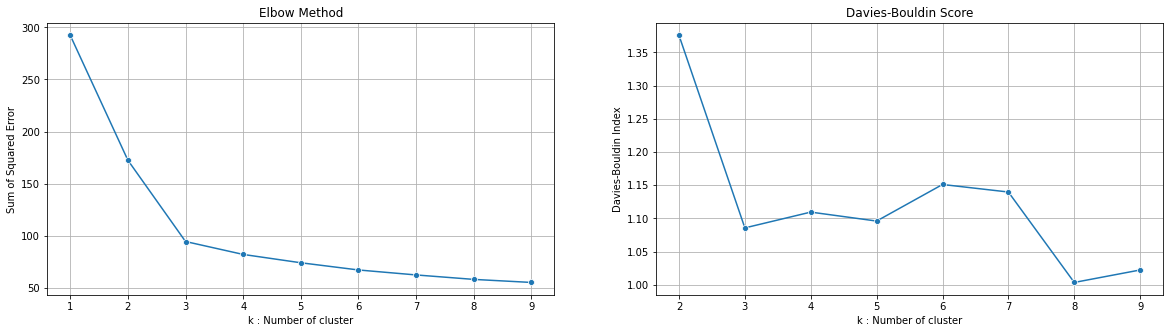

In [ ]:
# Plot untuk elbow method
fig = plt.subplots(nrows = 1, ncols = 1, figsize = (20,5))
plt.subplot(1,2,1)
sns.lineplot(x = list(sse.keys()), y = list(sse.values()), marker ='o');
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid(True)

plt.subplot(1,2,2)
sns.lineplot(x = range(2,KMAX), y = dbs, marker ='o');
plt.title('Davies-Bouldin Score')
plt.xlabel("k : Number of cluster")
plt.ylabel("Davies-Bouldin Index")
plt.grid(True)
plt.show()

Didapat K = 3 merupakan K yang optimal berdasarkan analisis di atas, maka akan dilakukan K-means clustering dengan K = 3.

In [ ]:
MAX_ITERATION = 100

k = 3
centroids = initialize_centroids(X_train, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < MAX_ITERATION and not centroids.equals(old_centroids):
  old_centroid = centroids

  labels = get_labels(X_train, centroids)
  inertia = get_inertia(X_train,centroids)
  centroids = new_centroids(X_train, labels, k)
  iteration += 1

hasil_clustering = X_train.copy()
hasil_clustering.loc[:,'Cluster'] = labels

Akan divisualisasikan boxplot untuk setiap atribut dari masing-masing cluster.

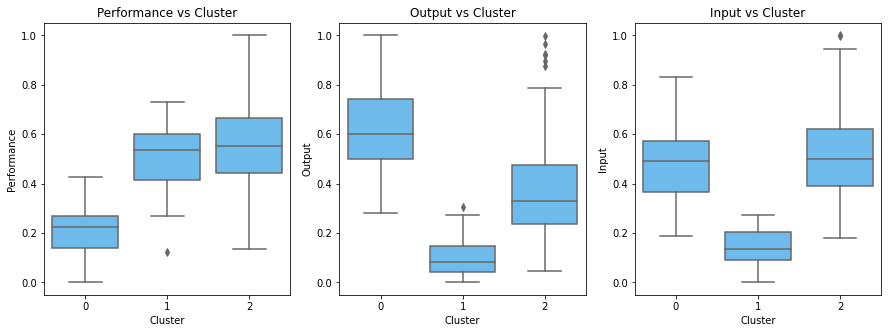

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))

plt.subplot(1,3,1)
sns.boxplot(x = 'Cluster', y = 'Performance', data  = hasil_clustering, color = '#59BFFF');
plt.title('Performance vs Cluster')

plt.subplot(1,3,2)
sns.boxplot(x = 'Cluster', y = 'Output', data  = hasil_clustering, color = '#59BFFF');
plt.title('Output vs Cluster')

plt.subplot(1,3,3)
sns.boxplot(x = 'Cluster', y = 'Input', data  = hasil_clustering, color = '#59BFFF');
plt.title('Input vs Cluster')

plt.show()

Akan divisualisasikan secara 3 dimensi hasil dari clustering.

In [ ]:
#px.scatter_3d(x=centroids[:,0], y=centroids[:,1], z=centroids[:,2], symbol=["x", "x", "x"], color=["black", "black", "black"], size_max=0.1)
fig = px.scatter_3d(X_train, x='Input', y='Output', z='Performance', color=labels, size_max=0.1)

fig.update_layout(
    autosize=False,
    width=800,
    height=800,)
fig.update_traces(marker={'size': 4})

In [ ]:
# Tampilkan jumlah anggota tiap cluster
print(labels.value_counts())

# Tampilkan silhouette score
print("Silhoutte Score:", silhouette_score(X_train, labels))

# Tampilkan davies-bouldin score
print("Davies-Bouldin Index:", davies_bouldin_score(X_train, labels))

2    276
0     46
1     28
dtype: int64
Silhoutte Score: 0.18728282107159158
Davies-Bouldin Index: 1.0818571072193535


In [ ]:
hasil_clustering

,Input,Output,Performance,Cluster
3,0.65,0.43,0.53,2
8,0.47,0.55,0.42,2
9,0.66,0.71,0.30,0
14,0.29,0.68,0.18,0
15,0.54,0.70,0.23,0
...,...,...,...,...
516,0.22,0.28,0.35,2
517,0.16,0.16,0.61,1
519,0.26,0.08,0.58,1
520,0.20,0.11,0.27,1


Secara garis besar, dapat kita ambil arti tiap clustering dari grafik 3 dimensi dan boxplot di atas. Karena terdapat 3 cluster, maka:
1. Cluster hari normal
2. Cluster hari normal dengan influent dan effluent(input-output) rendah
3. Cluster hari dengan kemungkinan adanya fault pada instalasi pengolahan air